# TASK 1 - Prediction using Supervised ML

# Problem - Predict the percentage of an student based on the no. of study hours.

In [1]:
## IMPORTING LIBRERIES ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## IMPORTING THE DATASET ##
x="http://bit.ly/w-data"
file=pd.read_csv(x)

In [3]:
file.shape      ## SHAPE OF THE DATASET ##

(25, 2)

In [4]:
file           ## THE DATASET ##

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
file.info()      ## INFORMATION ABOUT THE DATASET ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
file.describe().transpose()   ## GETTING DETAILS ABOUT THE DATESET ##

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [8]:
file.isnull().sum() ## SCOUTING FOR NULL VALUES  ##

Hours     0
Scores    0
dtype: int64

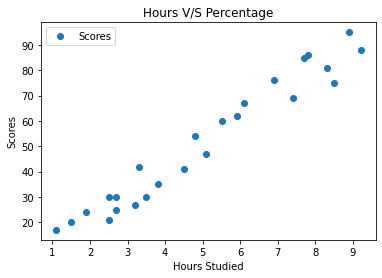

In [9]:
## VISUALIZING THE DATA ##
file.plot(x='Hours',y='Scores',style='o')
plt.title('Hours V/S Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [10]:
file.corr()   ## CORRELATION BETWEEN HOURS AND SCORE ##

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
## PERFORMING THE TRAIN-TEST SPLIT ##
a = file.iloc[:, :-1].values
b = file.iloc[:, 1].values
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(a_train ,  b_train)

LinearRegression()

In [12]:
## PREDICTING THE DATA ##
predect = linear.predict(a_test)
b1=linear.predict(a_train)

In [13]:
f=pd.DataFrame({"Actual_Time":b_test,'Predicted_Time':predect}) ## COMPARING BETWEEN ACTUAL AND PREDICTED TIME ##
f

,Actual_Time,Predicted_Time
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


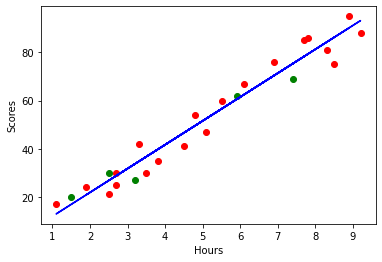

In [14]:
## VISUALISING THE TRAIN AND TEST RESULTS ##
plt.scatter(a_train,b_train,color='r')
plt.scatter(a_test,b_test,color='g')
plt.plot(a_train,b1,color='b')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [15]:
print("For 9.25Hr a day a student will score :",linear.predict([[9.25]]),'%')

For 9.25Hr a day a student will score : [93.69173249] %


In [16]:
from sklearn import metrics    
print('Mean Absolute Error:',metrics.mean_absolute_error(b_test,predect))


Mean Absolute Error: 4.183859899002982


In [ ]:
## For 9.25Hr a day a student will score : 93.69% ##